# Exploratory Data Analysis of Kickstarter Project Data

**Description:**  
There’s a free dataset on Kaggle with Kickstarter project data from May 2009 to March 2018. Let's perform some EDA on the data (Exploratory Data Analysis) to gather any insights. In the future for a more challenging project, we can apply machine learning to the dataset to predict whether a project will succeed or not.

https://www.kaggle.com/kemical/kickstarter-projects

*Note: the dataset is in a zip file with 2 csv files in it: 2016 and 2018.  The data in both files is mostly the same but the 2016 one is older and uses a non-standard format, so for this let's just use the 2018 file only.*

**Questions to Answer:**  
1a. Examine the `state` column to see unique values and counts.  
1b. Show a pie chart of the `state` project count for all projects.  
1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.  
*note - from here out we'll be looking at the completed project data unless mentioned otherwise*

2a. What is the overall success rate for all completed kickstarter projects?  
2b. Which 5 projects were pledged the most money (usd_pledged_real)?  
2c. Which 5 projects had the most backers?  
2d. Which year had the most competition? (# of projects)  

3a. What is the success rate for all projects broken down by `main_category`?  
3b. Show a horizontal bar chart for project success rate by `main_category`, sorted by highest to lowest.  
3c. Within the Games `main_category`, what is the success rate for each `category` within it?  

4a. Calculate the 'pct_of_goal' for each completed project.  
4b. What were the top 5 projects when looking at pct_of_goal for all time?  
4c. Plot a histogram distribution of all completed projects by pct_of_goal  
4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)  

5a. What is the average `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5b. What is the median `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5c. What is the average `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5d. What is the median `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5e. What insights does this information provide? (be creative)  
5f. Based on this information, if someone wanted to choose the `main_category` with the highest combined success rate and pledged dollar amount, which one would you recommend?  

6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.  
6b. Compare the avg months for successful projects vs non-successful.  Add visuals if you'd like.  
6c. Does the length of a project in months seem to have an impact?  

*Let's zoom in on Games: Video Games (main_category: category)*

7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).  
7b. Do this again but broken down by deadline year  
7c. Show this in a bar chart  
7d. What insights does this data provide you?  

*Let's zoom in on personal planners*

8a. Calculate the count, success rate, and pct_of_goal for all projects with 'planner' in the name.  
8b. How about all projects with both 'planner' and 'Panda' in the name?  

*Bonus insights* - feel free to add any other interesting findings from the dataset here  

*Future ML project:* Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful?  What features (data points) are most important in determining if a project will be successful or not?

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from zipfile import ZipFile   # to unzip files pulled from Kaggle API
import kaggle  # Kaggle API to pull the dataset files directly from their website

In [24]:
# Set the style for viz
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

## Download and Import the Data from Kaggle

In [25]:
# uncomment below if you haven't installed the kaggle api
# !pip install kaggle

In [26]:
# Download the Kickstarter dataset
# Note that you'll need to have your Kaggle API key saved on your computer for this to work
!kaggle datasets download kemical/kickstarter-projects

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
# files are compressed in a zip so use this to access them
zf = ZipFile('kickstarter-projects.zip')
zf.infolist()

[<ZipInfo filename='ks-projects-201612.csv' compress_type=deflate file_size=46500324 compress_size=17193872>,
 <ZipInfo filename='ks-projects-201801.csv' compress_type=deflate file_size=58030359 compress_size=21376870>]

In [28]:
# Import the 2018 data

ks = pd.read_csv(zf.open('ks-projects-201801.csv'))
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The 2016 dataset is not in standard utf-8 so Pandas can't read it unless it's converted

In [29]:
import chardet  # this is to detect what character enconding they're using
rawdata = zf.open('ks-projects-201612.csv')
chardet.detect(rawdata.read(100000))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [30]:
ks2016 = pd.read_csv(zf.open('ks-projects-201612.csv'), encoding='Windows-1252')
ks2016.head()

C:\Users\brian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Looks like the data is the same, so let's just use the 2018 dataset.  It has more recent data and is in standard format.  

In [31]:
# Remove 2016 data from memory.
%xdel ks2016

## Data Cleaning

In [33]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [34]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [35]:
ks.set_index('ID', inplace=True)
ks.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Change dates to datetime format

In [36]:
ks['deadline'] = pd.to_datetime(ks['deadline'])
ks['launched'] = pd.to_datetime(ks['launched'])
ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 43.3+ MB


#### Look into any missing data

In [37]:
ks.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [38]:
ks[ks['name'].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


It's fine, i'll keep em

## Data Analysis

Taking a quick look at the data before answering the Challenge questions

In [54]:
# look at main categories
ks['main_category'].value_counts().to_frame()

,main_category
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816
Theater,10913


In [55]:
# look at categories (sub-categories within categories)
ks['category'].value_counts().to_frame()

,category
Product Design,22314
Documentary,16139
Music,15727
Tabletop Games,14180
Shorts,12357
...,...
Residencies,69
Letterpress,49
Chiptune,35
Literary Spaces,27


In [59]:
# Look at Main Category broken down by Category in hierarchy
ks.groupby(['main_category', 'category']).mean()

goal       pledged     backers  \
main_category category                                                  
Art           Art              48928.058694   4094.137150   44.748697   
              Ceramics         13698.081967   5367.204000   47.714754   
              Conceptual Art   50071.740612   1661.477515   26.845631   
              Digital Art      11130.547273   2526.301961   32.539376   
              Illustration     35800.135109   4648.380428   64.698898   
...                                     ...           ...         ...   
Theater       Immersive       150548.857576   4575.270667   45.357576   
              Musical          57729.682366   4950.294830   46.153341   
              Plays            12233.005806   3452.115581   37.283745   
              Spaces          276676.028169  11081.795211  100.225352   
              Theater          12646.546353   3963.230962   48.556610   

                              usd pledged  usd_pledged_real  usd_goal_real  
main_category category                                                      
Art           Art             2932.295249       3583.300344   47390.449324  
              Ceramics        3460.919836       4705.871639   12958.270984  
              Conceptual Art  1417.431534       1627.221913   43058.718340  
              Digital Art     1603.850906       1883.514160   10565.531605  
              Illustration    2302.112954       3429.812419   28901.612482  
...                                   ...               ...            ...  
Theater       Immersive       3689.468364       4591.354273  151793.056182  
              Musical         4046.600942       4903.114020   54186.796813  
              Plays           2420.760588       3131.395377   11323.381974  
              Spaces          7547.819906      10788.126995  274208.108028  
              Theater         3802.367300       3971.313426   12779.064683  

[170 rows x 6 columns]

In [67]:
# Look at Categories within the `Games` main_category
ks[ks['main_category']=='Games'].groupby('category').mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,
Games,55731.222312,6862.093041,83.408555,5662.533380,6547.962514,52439.499120
Gaming Hardware,123542.511682,40178.519416,284.074766,36979.348832,40089.047780,77286.423248
Live Games,177160.558095,2681.264314,23.365714,1422.456000,2211.371819,172522.384752
Mobile Games,45896.916713,2645.085892,20.816098,910.993387,1409.468178,29806.699419
Playing Cards,12430.482179,9154.293348,155.740889,4867.349018,6726.929944,10732.051478
Puzzles,20097.731602,6675.291299,116.017316,4299.588874,6138.909437,12832.804069
Tabletop Games,15805.223766,34111.781137,426.601199,23220.334012,32703.317869,14695.385157
Video Games,86730.084533,18203.355211,373.584531,16470.524955,18280.109172,76740.858763


In [57]:
# look at countries
ks['country'].value_counts().to_frame().head(7)

,country
US,292627
GB,33672
CA,14756
AU,7839
DE,4171
"N,0""",3797
FR,2939


## Questions to Answer:

#### 1a. Examine the state column to see unique values and counts.

In [42]:
state = ks['state'].value_counts().to_frame()
state

,state
failed,197719
successful,133956
canceled,38779
undefined,3562
live,2799
suspended,1846


#### 1b. Show a pie chart of the state project count for all projects.

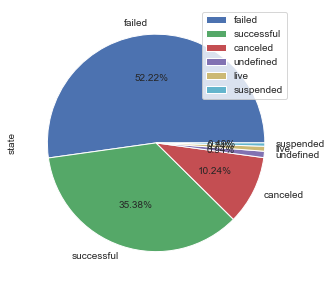

In [53]:
state.plot.pie(y='state', figsize=(5,5), autopct='%.2f%%')

#### 1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.

In [73]:
completed = ks[(ks['state']=='successful') | (ks['state']=='failed') | (ks['state']=='canceled')]
completed.state.value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

#### 2a. What is the overall success rate for all completed kickstarter projects?

# ---

### Which main category was most successful?

In [21]:
# Overall total projects
len(ks.index)

378661

In [22]:
# Overall total successful projects
ks['state'].str.match('successful').sum()

133956

In [23]:
# Overall success %
ks['state'].str.match('successful').sum() / len(ks.index) * 100

35.37623362321443

Oof, only 35.4% succeed

In [24]:
main_categ['success'] = ks[ks['state'].str.match('successful')].groupby(by='main_category').count()[['state']]
main_categ

,main_category,success
Film & Video,63585,23623
Music,51918,24197
Publishing,39874,12300
Games,35231,12518
Technology,32569,6434
Design,30070,10550
Art,28153,11510
Food,24602,6085
Fashion,22816,5593
Theater,10913,6534


In [25]:
main_categ['success_pct'] = round( (main_categ['success'] / main_categ['main_category'] * 100), 2)
main_categ.sort_values('success_pct', ascending=False)

,main_category,success,success_pct
Dance,3768,2338,62.05
Theater,10913,6534,59.87
Comics,10819,5842,54.00
Music,51918,24197,46.61
Art,28153,11510,40.88
Film & Video,63585,23623,37.15
Games,35231,12518,35.53
Design,30070,10550,35.08
Publishing,39874,12300,30.85
Photography,10779,3305,30.66


In [26]:
ks.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
ks